
# Multi-objective Bayesian Optimization


TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
%reset -f

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

from copy import deepcopy

import pandas as pd
import numpy as np
import torch

from xopt import Xopt, Evaluator
from xopt.generators.bayesian import MOBOGenerator
from xopt.resources.test_functions.tnk import evaluate_TNK, tnk_vocs


evaluator = Evaluator(function=evaluate_TNK)
print(tnk_vocs.dict())

{'variables': {'x1': [0.0, 3.14159], 'x2': [0.0, 3.14159]}, 'constraints': {'c1': ['GREATER_THAN', 0.0], 'c2': ['LESS_THAN', 0.5]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {}}


In [2]:
options = MOBOGenerator.default_options()
options.n_initial = (2,)
options.optim.num_restarts = 1
options.optim.raw_samples = 50
options.acq.proximal_lengthscales = [1.0, 1.0]
options.acq.reference_point = {"y1":1.5,"y2":1.5}
options.model.kwargs.use_low_noise_prior = True
print(options)
generator = MOBOGenerator(tnk_vocs, options)

X = Xopt(generator=generator, evaluator=evaluator, vocs=tnk_vocs)
X.evaluate_data(pd.DataFrame({"x1":[1.0, 0.75],"x2":[0.75, 1.0]}))
for i in range(30):
    print(i)
    X.step()

optim=OptimOptions(num_restarts=1, raw_samples=50, sequential=True, use_nearby_initial_points=False, max_travel_distances=None) acq=MOBOAcqOptions(proximal_lengthscales=[1.0, 1.0], use_transformed_proximal_weights=True, monte_carlo_samples=128, reference_point={'y1': 1.5, 'y2': 1.5}) model=ModelOptions(function=<function create_standard_model at 0x7f3f45bef9d0>, kwargs=kwargs(use_conservative_prior_lengthscale=False, use_conservative_prior_mean=False, use_low_noise_prior=True)) n_initial=(2,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [3]:
X.generator.data

,x1,x2,y1,y2,c1,c2,some_array,xopt_runtime,xopt_error,a
1,1.000000,0.750000,1.000000,0.750000,0.626888,0.312500,"[1, 2, 3]",0.000038,False,NaN
2,0.750000,1.000000,0.750000,1.000000,0.626888,0.312500,"[1, 2, 3]",0.000011,False,NaN
3,0.370781,1.379213,0.370781,1.379213,1.088556,0.789712,"[1, 2, 3]",0.000032,False,dummy_constant
4,0.604668,1.145337,0.604668,1.145337,0.669228,0.427415,"[1, 2, 3]",0.000033,False,dummy_constant
5,1.206775,0.543302,1.206775,0.543302,0.663028,0.501406,"[1, 2, 3]",0.000032,False,dummy_constant
6,1.507480,1.186541,1.507480,1.186541,2.712434,1.486355,"[1, 2, 3]",0.000031,False,dummy_constant
7,0.000000,0.000000,0.000000,0.000000,-1.100000,0.500000,"[1, 2, 3]",0.000032,False,dummy_constant
8,0.984951,0.223554,0.984951,0.223554,0.111026,0.311600,"[1, 2, 3]",0.000034,False,dummy_constant
9,0.425647,0.868172,0.425647,0.868172,-0.118266,0.141079,"[1, 2, 3]",0.000033,False,dummy_constant
10,0.325344,1.070214,0.325344,1.070214,0.250251,0.355649,"[1, 2, 3]",0.000033,False,dummy_constant


## plot results


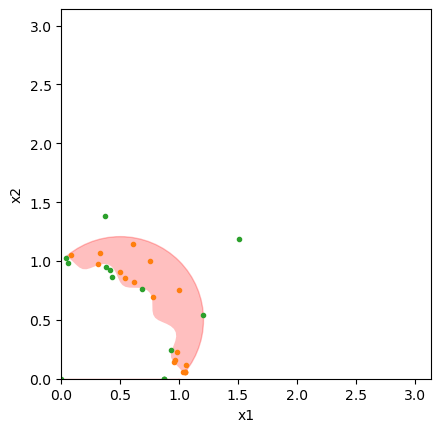

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

theta = np.linspace(0, np.pi / 2)
r = np.sqrt(1 + 0.1 * np.cos(16 * theta))
x_1 = r * np.sin(theta)
x_2_lower = r * np.cos(theta)
x_2_upper = (0.5 - (x_1 - 0.5) ** 2) ** 0.5 + 0.5

z = np.zeros_like(x_1)

# ax2.plot(x_1, x_2_lower,'r')
ax.fill_between(x_1, z, x_2_lower, fc="white")
circle = plt.Circle(
    (0.5, 0.5), 0.5 ** 0.5, color="r", alpha=0.25, zorder=0, label="Valid Region"
)
ax.add_patch(circle)
history = pd.concat(
    [X.data, tnk_vocs.feasibility_data(X.data)], axis=1, ignore_index=False
)


ax.plot(*history[["x1", "x2"]][history["feasible"]].to_numpy().T, ".C1")
ax.plot(*history[["x1", "x2"]][~history["feasible"]].to_numpy().T, ".C2")

ax.set_xlim(0, 3.14)
ax.set_ylim(0, 3.14)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_aspect("equal")

### Plot path through input space

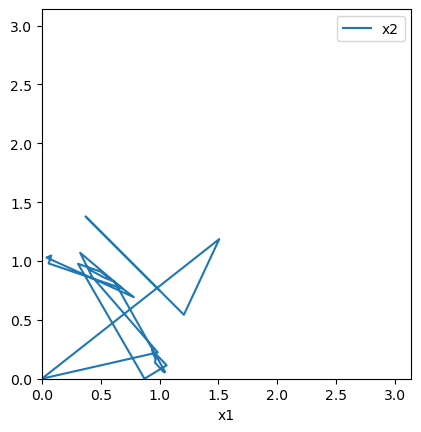

In [5]:
ax = history.plot("x1", "x2")
ax.set_ylim(0, 3.14)
ax.set_xlim(0, 3.14)
ax.set_aspect("equal")

[[0.27445928 1.00755272]]


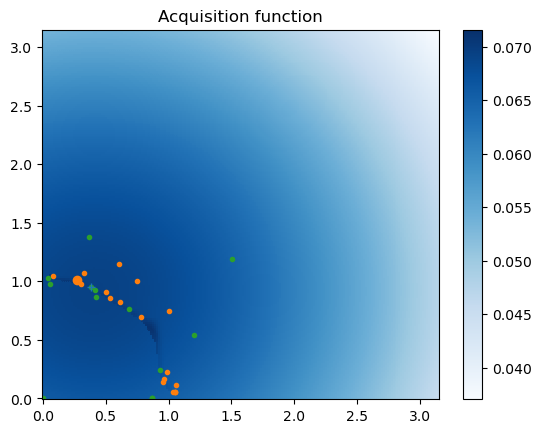

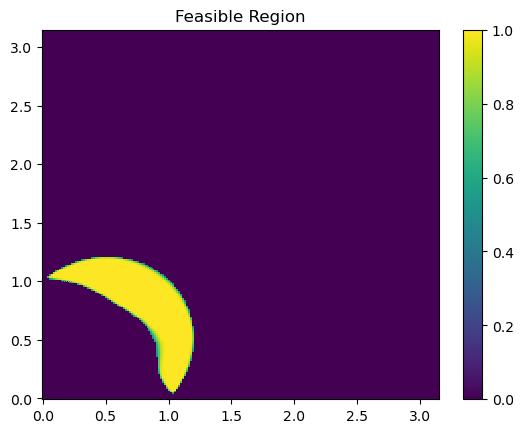

In [6]:
# plot the acquisition function
from xopt.generators.bayesian.utils import feasibility

bounds = generator.vocs.bounds
model = generator.model

# create mesh
n = 200
x = torch.linspace(*bounds.T[0], n)
y = torch.linspace(*bounds.T[1], n)
xx, yy = torch.meshgrid(x, y)
pts = torch.hstack([ele.reshape(-1, 1) for ele in (xx, yy)]).double()

acq_func = generator.get_acquisition(model)
with torch.no_grad():
    acq_pts = pts.unsqueeze(1)
    acq = acq_func(acq_pts)

    fig, ax = plt.subplots()
    c = ax.pcolor(xx, yy, acq.reshape(n, n), cmap="Blues")
    fig.colorbar(c)
    ax.set_title("Acquisition function")

    ax.plot(*history[["x1", "x2"]][history["feasible"]].to_numpy().T, ".C1")
    ax.plot(*history[["x1", "x2"]][~history["feasible"]].to_numpy().T, ".C2")

    ax.plot(*history[["x1", "x2"]].to_numpy()[-1].T, "+")

    feas = feasibility(pts.unsqueeze(1), model, generator.sampler, tnk_vocs).flatten()

    fig2, ax2 = plt.subplots()
    c = ax2.pcolor(xx, yy, feas.reshape(n, n))
    fig2.colorbar(c)
    ax2.set_title("Feasible Region")

candidate = generator.generate(1)
print(candidate[["x1", "x2"]].to_numpy())
ax.plot(*candidate[["x1", "x2"]].to_numpy()[0], "o")

In [7]:
%%time
candidate = generator.generate(1)

CPU times: user 2.23 s, sys: 16.8 ms, total: 2.25 s
Wall time: 1.2 s
